___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [1]:
# Importing Pandas and datetime Library
import pandas as pd
from datetime import datetime

# Avoiding unneccessary warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

# Reading police.csv file, creating DataFrame named ri
ri = pd.read_csv('police.csv.zip', nrows=50000)

# Dropping county_name, county_fips, fine_grained_location,search_type_raw,search_type, states columns from DataFrame
ri.drop(['county_name','county_fips','fine_grained_location','search_type_raw','state'], axis=1, inplace=True)

# Dropping rows that contains missing values of driver_gender column
ri.dropna(subset=['driver_gender'], inplace=True)

# Changing is_arrested column data type from object to bool
ri['is_arrested'] = ri['is_arrested'].astype('bool')

# Concatenate stop_date and stop_time
ri['combined'] = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')

# Converting combined column data format from object to datetime, and storing result in new stop_datetime coolumn
ri['stop_datetime'] = pd.to_datetime(ri['combined'])

# Setting stop_datetime column as index of the DataFrame
ri.set_index('stop_datetime', inplace=True)

# Dropping stop_date, stop_time, combined columns
ri.drop(['stop_date', 'stop_time', 'combined'], axis=1, inplace=True)

# Examining first five rows of the DataFrame
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [2]:
# Calculating the mean of is_arrested columns to see overall arrest rate
print('Overall arrest rate is:', ri['is_arrested'].mean())

Overall arrest rate is: 0.05182253697146428


In [3]:
# Grouping by hours to find hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

In [4]:
# Examining hourly_arrest_rate Series
hourly_arrest_rate

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [5]:
# Importing matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

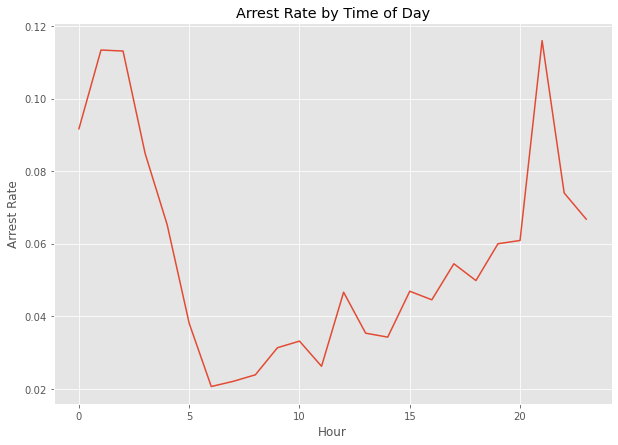

In [6]:
# Creating a line plot of hourly_arrest_rate
hourly_arrest_rate.plot(figsize=(10,7))
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

In [7]:
# Arrest rates during the first and last hours of the day are higher than morning and noon

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [8]:
#1st and 2nd questions
# annual rate of drug-related stops by resampling the drugs_related_stop column and taking the mean.
annual_drug_rate= ri['drugs_related_stop'].resample('A').mean()
annual_drug_rate

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006257
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [9]:
# Calculating annual rate of drug-related stops
annual_drug_rate = ri.groupby(ri.index.year)['drugs_related_stop'].mean()

In [10]:
# Examining the annual_drug_rate Series
annual_drug_rate

stop_datetime
2005    0.008038
2006    0.006257
Name: drugs_related_stop, dtype: float64

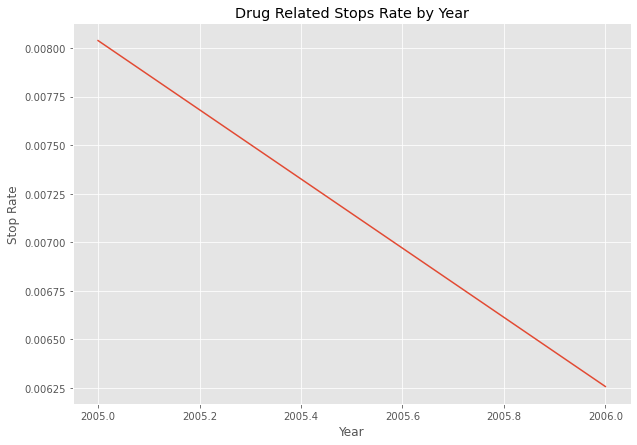

In [11]:
# Creating a line plot of annual_drug_rate
annual_drug_rate.plot(figsize=(10,7))
plt.xlabel('Year')
plt.ylabel('Stop Rate')
plt.title('Drug Related Stops Rate by Year')
plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [12]:
#Calculate the annual search rate by resampling the search_conducted column, and save the result as annual_search_rate
annual_search_rate= ri['search_conducted'].resample('A').mean()
annual_search_rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.038361
Freq: A-DEC, Name: search_conducted, dtype: float64

In [13]:
# Calculating annual rate of annual_search_rate
annual_search_rate = ri.groupby(ri.index.year)['search_conducted'].mean()

In [14]:
# Examining annual_search_rate Series
annual_search_rate

stop_datetime
2005    0.050692
2006    0.038361
Name: search_conducted, dtype: float64

In [15]:
# Concatanating annual_drug_rate and annual_search_rate Series
annual = pd.concat([annual_drug_rate, annual_search_rate], axis=1)

In [16]:
# Examining concatanated DataFrame
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005,0.008038,0.050692
2006,0.006257,0.038361


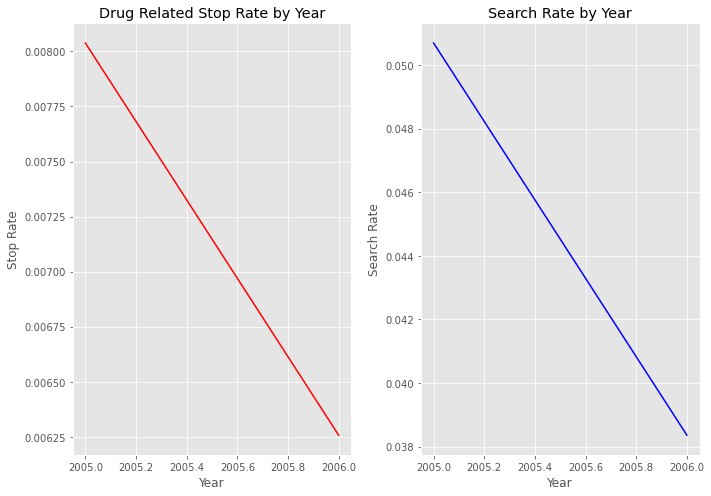

In [17]:
# Creating subplots of drugs_related_stop and search_conducted
fig =  plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(annual.index, annual['drugs_related_stop'], 'r', )
plt.xlabel('Year')
plt.ylabel('Stop Rate')
plt.title('Drug Related Stop Rate by Year')

plt.subplot(1,2,2)
plt.plot(annual.index, annual['search_conducted'], 'b')
plt.xlabel('Year')
plt.ylabel('Search Rate')
plt.title('Search Rate by Year')
plt.tight_layout()
plt.show()

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [18]:
# Creating a frequency table from district and violation columns
all_zones = pd.crosstab(ri.district, ri.violation)

In [19]:
# Examining all_zones DataFrame
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608
Zone X1,93,643,44,9,1128
Zone X3,342,741,127,102,4148
Zone X4,806,2220,249,609,6679


In [20]:
# Selecting K zones with .loc[] accessor
k_zones = all_zones.loc['Zone K1':'Zone K3']

In [21]:
# Examining k_zones DataFrame
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

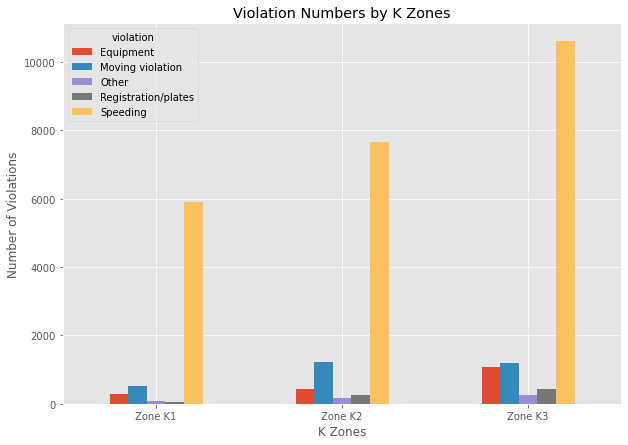

In [22]:
# Creating bar plot of k_zones DataFrame
ax = k_zones.plot.bar(rot=0, figsize=(10,7))
plt.title('Violation Numbers by K Zones')
plt.xlabel('K Zones')
plt.ylabel('Number of Violations')
plt.show()

In [23]:
# Speeding is the major violation in each zone
# K3 Zone is the area that higher number of violations committed

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

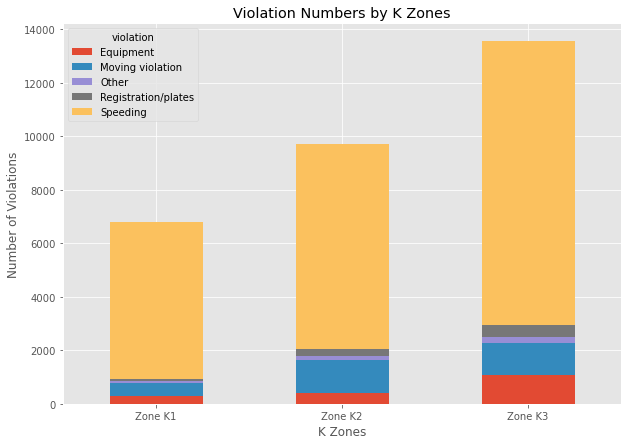

In [24]:
# Creating a stacked bar plot of k_zones DataFrame
ax = k_zones.plot.bar(rot=0, figsize=(10,7), stacked=True)
plt.title('Violation Numbers by K Zones')
plt.xlabel('K Zones')
plt.ylabel('Number of Violations')
plt.show()

In [25]:
# It's obviously clear that violation number is increasing from K1 Zone to K3 Zone

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [26]:
# Finding unique values of stop_duration column
ri['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [27]:
# Creating a mapping dictionary
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [28]:
# Checking the dictionary
mapping

{'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

In [29]:
# Creating a new column named 'stop_minutes' by mapping stop_duration column
ri['stop_minutes'] = ri['stop_duration'].map(mapping)

In [30]:
# Checking stop_minutes column
ri['stop_minutes']

stop_datetime
2005-01-02 01:55:00     8
2005-01-02 20:30:00    23
2005-01-04 12:55:00     8
2005-01-06 01:30:00     8
2005-01-12 08:05:00    45
                       ..
2006-08-08 22:45:00     8
2006-08-08 22:45:00     8
2006-08-08 22:53:00    23
2006-08-08 23:00:00     8
2006-08-08 23:00:00    23
Name: stop_minutes, Length: 48010, dtype: int64

In [31]:
# Checking unique values of stop_minutes column
ri['stop_minutes'].unique()

array([ 8, 23, 45], dtype=int64)

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [32]:
# Calculating mean stop_minutes for each violation_raw value
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()

In [33]:
# Examining the Series
stop_length

violation_raw
APB                                 28.078431
Call for Service                    27.637895
Equipment/Inspection Violation      13.668101
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Registration Violation              17.304170
Special Detail/Directed Patrol      30.902778
Speeding                             9.707181
Suspicious Person                   21.821429
Violation of City/Town Ordinance    11.153846
Warrant                             29.666667
Name: stop_minutes, dtype: float64

In [34]:
# Sorting the values of stop_length
stop_length.sort_values(ascending=False, inplace=True)

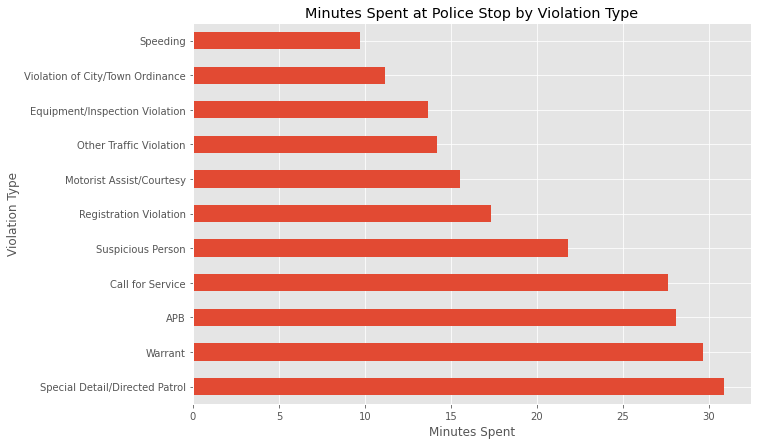

In [35]:
# Creating bar plot of stop_length DataFrame
ax = stop_length.plot.barh(rot=0, figsize=(10,7))
plt.title('Minutes Spent at Police Stop by Violation Type')
plt.xlabel('Minutes Spent')
plt.ylabel('Violation Type')
plt.show()

In [36]:
# More time spent on Warrant, Special Detail than any other violation types
# Speeding, Ordinance violation related stops lasted less than other stops